In [96]:
import pandas as pd
import numpy as np

import sklearn
from sklearn import datasets
from sklearn.utils import Bunch

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import keras as kr
import sklearn.preprocessing as pre
import sklearn.model_selection as mod
from keras import models, layers

In [97]:
boston = datasets.load_boston()

In [98]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [99]:
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
df['MEDV'] = boston['target']
medv = df['MEDV'].copy()
del df['MEDV']
df = pd.concat((medv, df), axis=1)

In [100]:
inputs = df.loc[:, df.columns != 'MEDV']
inputs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [101]:
outputs = df[['MEDV']]
outputs

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [102]:
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(inputs)
inputsWhite = pd.DataFrame(pca.transform(inputs), columns=inputs.columns)
inputsWhite 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.681737,-0.070328,-0.110906,0.324032,-0.257641,-1.195502,-0.257642,1.774739,-1.069788,-0.302890,0.749064,-0.290887,0.606963
1,-0.960939,0.127958,-1.076024,0.079408,0.052369,-0.613999,-0.156852,0.296642,0.258499,1.196095,0.096360,-0.386434,-0.599819
2,-0.963338,0.178102,-0.585647,-0.629399,-0.013232,-1.119363,0.428840,0.165237,0.229360,0.837983,-0.925444,-0.437518,-0.081586
3,-1.082361,0.231504,-0.228412,-1.202960,0.214394,-1.318206,-0.491872,0.274068,0.587810,0.887470,-0.546818,-0.214018,0.790989
4,-1.081808,0.203619,-0.459975,-0.868201,0.249464,-1.091127,-0.763402,0.334618,0.587477,1.033557,-1.065225,-0.225982,0.643021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.789154,0.073129,-0.733316,-0.349447,-0.068129,0.027581,0.942339,0.108110,1.608370,-1.555624,-0.638012,-0.258742,1.083075
502,-0.793743,0.013147,-0.936627,-0.053825,-0.127177,-0.216900,0.946965,0.140667,1.715690,-1.508870,0.471572,-0.268371,0.831583
503,-0.787386,0.011866,-1.303356,0.494394,-0.335579,-1.104183,1.171877,0.195967,2.005277,-1.241822,-0.589854,-0.426902,0.779639
504,-0.782367,0.053780,-1.258023,0.429652,-0.297891,-0.930280,1.104906,0.202194,1.984588,-1.094030,-0.384357,-0.389392,0.816168


In [103]:
import sklearn.decomposition as dec

In [104]:
x_train, x_test, y_train, y_test = mod.train_test_split(inputsWhite, outputs, test_size=0.5)

In [105]:
# Applies a scale to both the inputs train and test sets defined in the previous cell
scaler = pre.StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Prints the scaled inputs trained values to ensure they are calculating correctly
print(x_train_scaled[0])

[-0.74454703 -0.03969453  0.65553386  0.5604392  -0.09082277 -0.77347082
 -0.2139265   1.42157414 -0.58852689  1.38495517 -1.04556438 -0.25360246
  0.25696367]


In [106]:
# Creates the neural network and builds the appropriate layers
model = models.Sequential()

# Hidden layer with 13 neurons and an input layer 13
model.add(layers.Dense(13, activation='relu', input_dim=13))
model.add(layers.Dense(26, activation='relu'))
#model.add(layers.Dense(26, activation='linear'))
# Single output layer for MEDV prediction
model.add(layers.Dense(1, activation='relu'))

# RMSprop optimizer increases learning rate of the neural network
# MAE includes the mean_absolute error in the metrics for later evaluation
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error', 'acc'])

In [132]:
# Trains the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.2, epochs=100)

Train on 202 samples, validate on 51 samples
Epoch 1/100
202/202 [==============================] - 0s 97us/step - loss: 4.0107 - mean_absolute_error: 1.4160 - acc: 0.0198 - val_loss: 15.9333 - val_mean_absolute_error: 3.1905 - val_acc: 0.0000e+00
Epoch 2/100
202/202 [==============================] - 0s 99us/step - loss: 4.0728 - mean_absolute_error: 1.4241 - acc: 0.0198 - val_loss: 15.4811 - val_mean_absolute_error: 3.1652 - val_acc: 0.0000e+00
Epoch 3/100
202/202 [==============================] - 0s 59us/step - loss: 3.9624 - mean_absolute_error: 1.4096 - acc: 0.0149 - val_loss: 15.6119 - val_mean_absolute_error: 3.1744 - val_acc: 0.0000e+00
Epoch 4/100
202/202 [==============================] - 0s 54us/step - loss: 3.9527 - mean_absolute_error: 1.4047 - acc: 0.0198 - val_loss: 15.8260 - val_mean_absolute_error: 3.1604 - val_acc: 0.0000e+00
Epoch 5/100
202/202 [==============================] - 0s 59us/step - loss: 3.9595 - mean_absolute_error: 1.4288 - acc: 0.0198 - val_loss: 15.3

In [133]:
# Evaluates the Mean Squared Error, Mean Absolute Error and Accuracy metric values
model.evaluate(x_test_scaled, y_test)

253/253 [==============================] - 0s 20us/step


[27.391057010695867, 3.306865954116399, 0.03162055334495933]

In [134]:
# Selects the first 2 values from the training data to make a prediction
to_predict = x_train_scaled[:2]
predictions = model.predict(to_predict)
# Prints the predicted values
print(predictions)

[[32.762997]
 [22.13114 ]]


In [135]:
# Prints the actual values from the first 2 values from the MEDV training output set for comparison
print(y_train[:2])

     MEDV
341  32.7
205  22.6


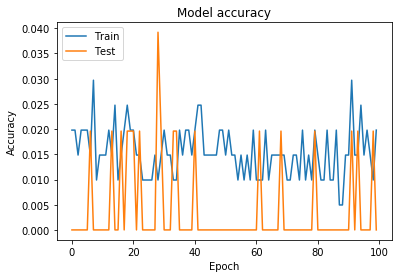

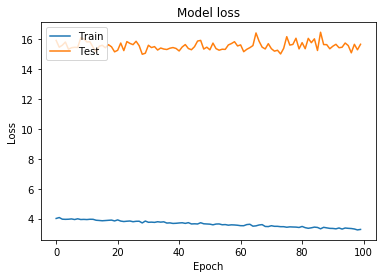

In [136]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()